In [1]:
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler  
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('./training.csv')
test_data = pd.read_csv('./testing.csv')

In [3]:
y_train = train_data['Appliances'].values
X_train = train_data.values[:,2:30]

y_test = test_data['Appliances'].values
X_test = test_data.values[:,2:30]

In [4]:
scaler_1 = StandardScaler()
scaler_1.fit(X_train)
X_train = scaler_1.transform(X_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
scaler_2 = StandardScaler()
scaler_2.fit(X_test)
X_test = scaler_2.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
clf = MLPRegressor(solver='adam',alpha=1e-5,hidden_layer_sizes=(28,),random_state=1)

In [7]:
clf.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(28,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
y_pred = clf.predict(X_test)

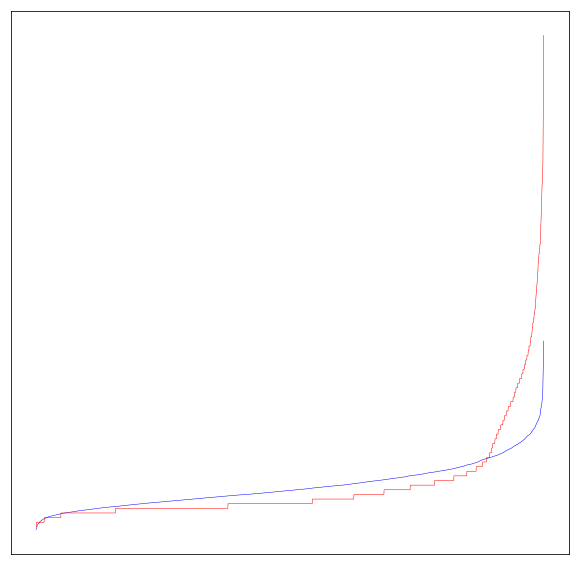

In [9]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(len(y_pred)), np.sort(y_pred), color='blue', linewidth=.5)

plt.plot(np.arange(len(y_test)), np.sort(y_test), color='red', linewidth=.5)

plt.xticks(())
plt.yticks(())

plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def cal_errors(y_test,y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rms = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print('MAE = {}, RMS = {}, R2 = {}, MAPE = {}'.format(mae,rms,r2,mape))

cal_errors(y_test, y_pred)

MAE = 49.69506415701798, RMS = 8112.477446743563, R2 = 0.21416088080340645, MAPE = 56.14290788414878
